In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset


In [2]:
train_data_path = r"C:\Users\Bhawar\IdeaProjects\Titanic_Machine_Learning_from_Disaster_1\data\train.csv"
test_data_path = r"C:\Users\Bhawar\IdeaProjects\Titanic_Machine_Learning_from_Disaster_1\data\test.csv"
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)
print("Shape of df_train: ", df_train.shape)
print("Shape of df_test: ", df_test.shape)

Shape of df_train:  (891, 12)
Shape of df_test:  (418, 11)


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 ## Data Integration

In [6]:
df = pd.concat([df_train, df_test])
print("Shape of Integrated Data/ Df: ", df.shape)

Shape of Integrated Data/ Df:  (1309, 12)


In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Get The Brief Information Of Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [10]:
int_features = df.select_dtypes(include=["int64"]).columns
print("total number of integer features :", int_features.shape[0])
print("Integer feature names:", int_features.tolist())

total number of integer features : 4
Integer feature names: ['PassengerId', 'Pclass', 'SibSp', 'Parch']


In [11]:
float_features = df.select_dtypes(include=["float64"]).columns
print("total number of integer features :", float_features.shape[0])
print("Integer feature names:", float_features.tolist())

total number of integer features : 3
Integer feature names: ['Survived', 'Age', 'Fare']


In [12]:
cat_features = df.select_dtypes(include=["object"]).columns
print("total number of categorical features :", cat_features.shape[0])
print("Integer categorical feature names:", cat_features.tolist())

total number of categorical features : 5
Integer categorical feature names: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## Get the Satatistical Information of Numerical Features

In [13]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
df.describe().shape

(8, 7)

In [15]:
df["Survived"]

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
30     0.0
31     1.0
32     1.0
33     0.0
34     0.0
35     0.0
36     1.0
37     0.0
38     0.0
39     1.0
40     0.0
41     0.0
42     0.0
43     1.0
44     1.0
45     0.0
46     0.0
47     1.0
48     0.0
49     0.0
50     0.0
51     0.0
52     1.0
53     1.0
54     0.0
55     1.0
56     1.0
57     0.0
58     1.0
59     0.0
60     0.0
61     1.0
62     0.0
63     0.0
64     0.0
65     1.0
66     1.0
67     0.0
68     1.0
69     0.0
70     0.0
71     0.0
72     0.0
73     0.0
74     1.0
75     0.0
76     0.0
77     0.0
78     1.0
79     1.0
80     0.0
81     1.0
82     1.0
83     0.0
84     1.0
85     1.0
86     0.0
87     0.0
88     1.0
89     0.0
90     0.0

## Visualise null/missing value

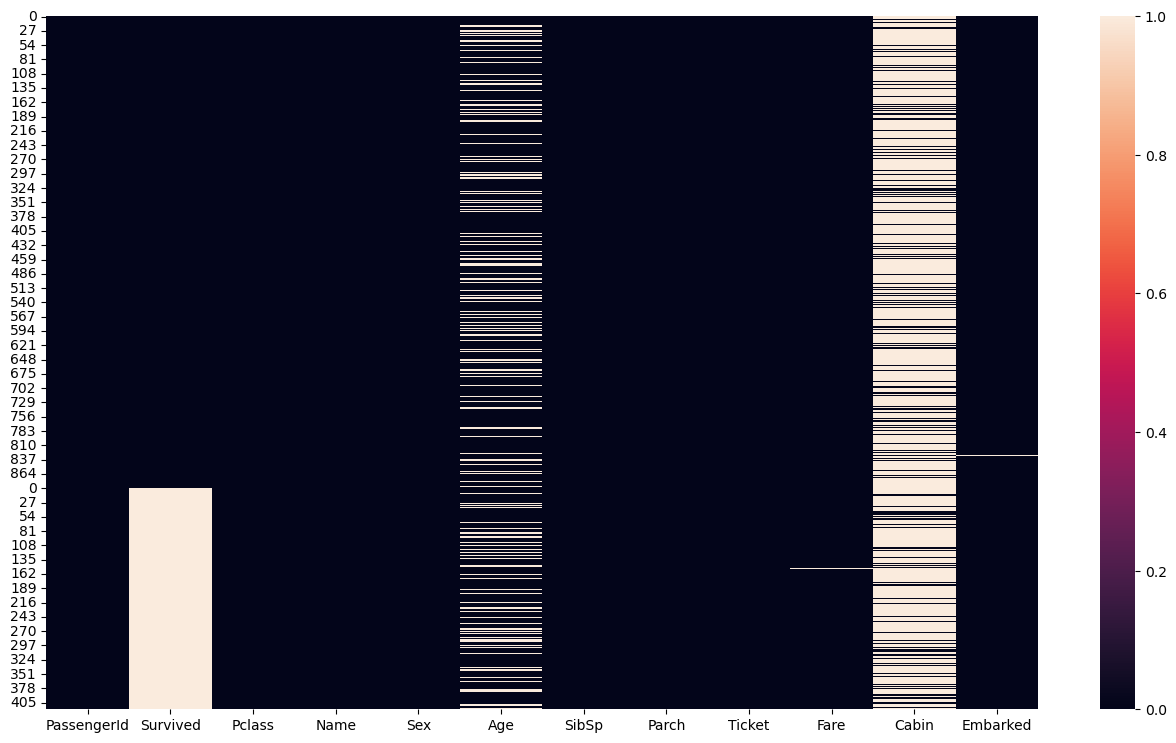

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

## Get the null value percentages for every feature

In [19]:
#set index as ID column
df = df.set_index("PassengerId")

In [20]:
null_count = df.isnull().sum()
null_count

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [26]:
## Drop Columns/Features
## As per observation, we will not drop any feature from dataset

"""As per domain knowledge we will not drop thoose featres, insead None value we will add constant value 'NA' """
miss_value_50_perc = null_percent[null_percent > 50]
miss_value_50_perc

Cabin    77.463713
dtype: float64

In [27]:
df["Age"].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
29.00    30
27.00    30
26.00    30
19.00    29
23.00    26
32.00    24
31.00    23
20.00    23
35.00    23
33.00    21
45.00    21
39.00    20
17.00    20
16.00    19
40.00    18
42.00    18
34.00    16
50.00    15
47.00    14
38.00    14
48.00    14
2.00     12
41.00    11
1.00     10
44.00    10
54.00    10
9.00     10
4.00     10
49.00     9
43.00     9
37.00     9
51.00     8
55.00     8
14.00     8
60.00     7
3.00      7
58.00     6
46.00     6
15.00     6
8.00      6
6.00      6
52.00     6
62.00     5
61.00     5
5.00      5
64.00     5
57.00     5
13.00     5
63.00     4
10.00     4
53.00     4
32.50     4
56.00     4
7.00      4
11.00     4
59.00     3
18.50     3
40.50     3
65.00     3
0.75      3
28.50     3
0.83      3
12.00     3
14.50     2
36.50     2
45.50     2
30.50     2
70.00     2
71.00     2
34.50     2
0.92      2
11.50     1
0.17      1
60.50     1
26.50     1
76.0

In [28]:
"""As per domain knowledge we will not drop thoose fireplceQu feature, insead None value we will add constant value 'NA' """
miss_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

Survived    31.932773
Age         20.091673
dtype: float64

In [29]:
miss_value_5_50_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_50_perc

Age    20.091673
dtype: float64

In [32]:
df["Survived"].value_counts().head()

0.0    549
1.0    342
Name: Survived, dtype: int64

<Axes: ylabel='PassengerId'>

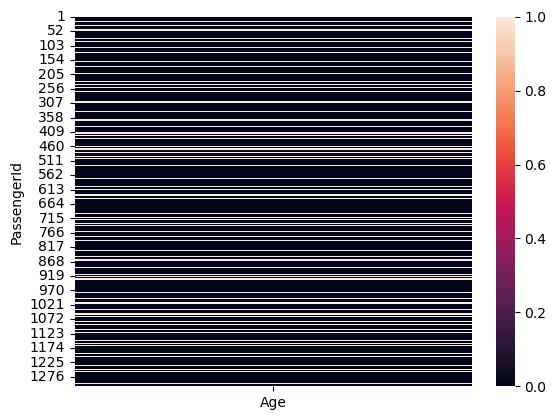

In [33]:
sns.heatmap(df[miss_value_5_50_perc.keys()].isnull())

## missing Value Inputation

In [34]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features =", len(missing_value_feat))

Total missing value features = 5


In [35]:
missing_value_feat

Survived    31.932773
Age         20.091673
Fare         0.076394
Cabin       77.463713
Embarked     0.152788
dtype: float64

In [36]:
cat_na_feat = missing_value_feat[ missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features=", len(cat_na_feat))
cat_na_feat



Total number of categorical missing features= 2


Cabin       77.463713
Embarked     0.152788
dtype: float64

In [37]:
int_na_feat = missing_value_feat[ missing_value_feat.keys().isin(int_features)]
print("Total number of categorical missing features=", len(int_na_feat))
int_na_feat


Total number of categorical missing features= 0


Series([], dtype: float64)

In [38]:
float_na_feat = missing_value_feat[ missing_value_feat.keys().isin(float_features)]
print("Total number of categorical missing features=", len(float_na_feat))
float_na_feat

Total number of categorical missing features= 3


Survived    31.932773
Age         20.091673
Fare         0.076394
dtype: float64